In [1]:
# The new version of dataset is only available in the tfds-nightly package.
%rm -rf ~/tensorflow_datasets/oxford_flowers102/
%rm -rf ~/tensorflow_datasets/downloads/
#%mkdir ~/tensorflow_datasets/oxford_flowers102/
%pip --no-cache-dir install -q tensorflow>=2 tfds-nightly
#!pip install tensorflow_datasets==2.1.0
# DON'T MISS TO RESTART THE KERNEL

In [2]:
%mv  ~/tensorflow_datasets/oxford_flowers102/2.1.1 ~/tensorflow_datasets/oxford_flowers102/2.0.0

mv: cannot stat '/root/tensorflow_datasets/oxford_flowers102/2.1.1': No such file or directory


In [3]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# TODO: Make all other necessary imports.
import pandas as pd
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

2020-07-24 19:22:58.431456: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
I0724 19:23:00.893611 140009331705728 download_and_prepare.py:201] Running download_and_prepare for dataset(s):
oxford_flowers102
2020-07-24 19:23:00.902795: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2020-07-24 19:23:01.109134: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2020-07-24 19:23:01.307901: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
I0724 19:23:01.498146 140009331705728 dataset_info.py:427] Load pre-computed DatasetInfo (eg: splits, num examples,...) from

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [7]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.2.0
	• tf.keras version: 2.3.0-tf
	• Running on GPU


In [8]:
# Download data to default local directory "~/tensorflow_datasets"

# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True, download=False)

#print the dataset information
print(dataset)
print(dataset_info)


{'test': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>, 'train': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>, 'validation': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/dat

In [9]:
# TODO: Data exploration.
shape_images = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes

num_training_examples  = dataset_info.splits['train'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples
num_validation_examples = dataset_info.splits['validation'].num_examples

print('There are {:,} classes in our dataset'.format(num_classes))
print('The images in our dataset have shape:', shape_images)

print('\nThere are {:,} images in the test set'.format(num_test_examples))
print('There are {:,} images in the training set'.format(num_training_examples))
print('There are {:,} images in the training set'.format(num_validation_examples))

There are 102 classes in our dataset
The images in our dataset have shape: (None, None, 3)

There are 6,149 images in the test set
There are 1,020 images in the training set
There are 1,020 images in the training set


In [10]:
# # TODO: Create a training set, a validation set and a test set.
total_examples = dataset_info.splits['train'].num_examples + dataset_info.splits['test'].num_examples + dataset_info.splits['validation'].num_examples 


# print the training, validation and test set.


print('There are {:,} images in the training set'.format(num_training_examples))
print('There are {:,} images in the validation set'.format(num_validation_examples))
print('There are {:,} images in the test set'.format(num_test_examples))

There are 1,020 images in the training set
There are 1,020 images in the validation set
There are 6,149 images in the test set


In [11]:
# TODO: Get the number of classes in each set from the dataset info.
num_classes = dataset_info.features['label'].num_classes
# TODO: Get the number of examples in the dataset from the dataset info.
total_num_examples = dataset_info.splits['train'].num_examples

print('The Dataset has a total of:')
print('\u2022 {:,} classes'.format(num_classes))
print('\u2022 {:,} images'.format(total_num_examples))

# TODO: Get the number of classes in the dataset from the dataset info.

The Dataset has a total of:
• 102 classes
• 1,020 images


In [12]:
# Check that dataset is a tuple
print('dataset has type:', type(dataset))

# Print the number of elements in dataset
print('dataset has {:,} elements '.format(len(dataset)))

dataset has type: <class 'dict'>
dataset has 3 elements 


In [13]:
training_set, test_set, validation_set= dataset['train'], dataset['test'], dataset['validation']

In [14]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print('The images in the training set have:\n\u2022 dtype:', image.dtype, '\n\u2022 shape:', image.shape)


The images in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (500, 667, 3)
The images in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (500, 666, 3)
The images in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (670, 500, 3)


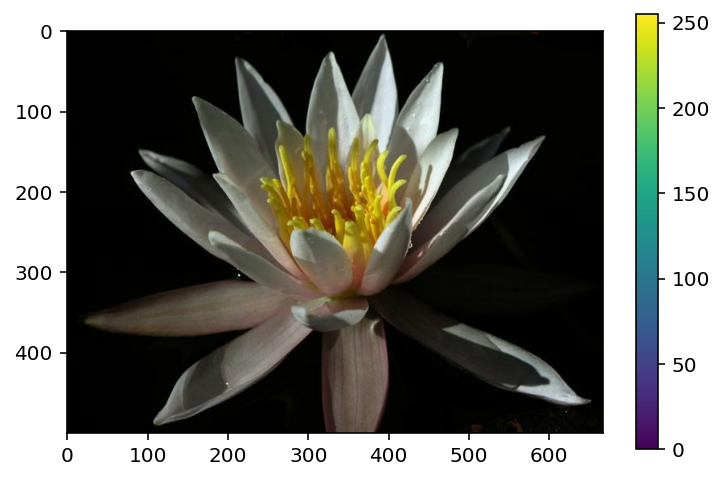

The label of this image is: 73


In [15]:
# TODO: Plot 1 image from the training set. 
import matplotlib.pyplot as plt    
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image)
plt.colorbar()
plt.show()

# Set the title of the plot to the corresponding image label. 
print('The label of this image is:', label+1)

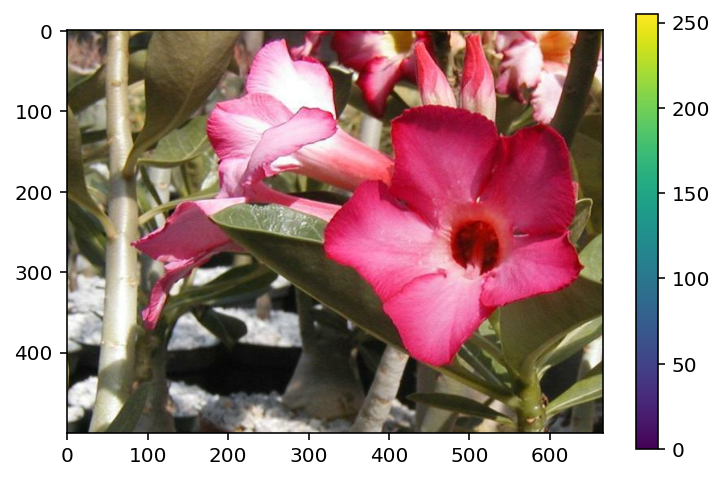

The label of this image is: 85


In [16]:
import matplotlib.pyplot as plt
for image, label in training_set.take(2):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image)
plt.colorbar()
plt.show()

print('The label of this image is:', label+1)

## **Label Mapping**

In [17]:
import json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

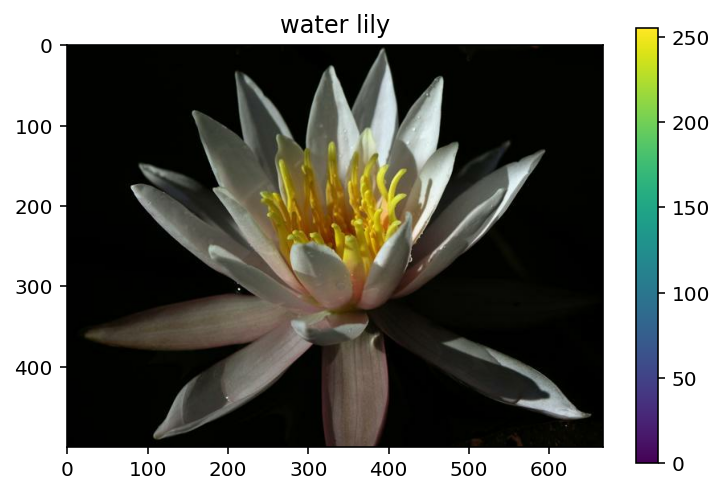

The label of this image is: 73


In [18]:
# TODO: Plot 1 image from the training set. Set the title of the plot to the corresponding class name. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.title(class_names[str(label+1)])
plt.imshow(image)
plt.colorbar()
plt.show()

print('The label of this image is:', label+1)
#print('The class name of this image is:', class_names[label])


In [19]:
# TODO: Create a pipeline for each set.
batch_size = 32
image_size = 224



def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label


training_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

In [20]:
## Solution
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))

In [21]:
feature_extractor.trainable = False

In [22]:
model = tf.keras.Sequential([feature_extractor,
                                 tf.keras.layers.Dense(800,activation='relu'),
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(400,activation='relu'),
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(num_classes, activation='softmax')
                                ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 800)               1024800   
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               40902     
Total params: 3,644,086
Trainable params: 1,386,102
Non-trainable params: 2,257,984
______________________________________

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 30
callback_path = "best_model_save.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(callback_path, save_best_only=True, save_weights_only=False)

history = model.fit(training_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/30
32/32 [==============================] - 9s 289ms/step - loss: 4.8287 - accuracy: 0.0304 - val_loss: 4.3183 - val_accuracy: 0.1559
Epoch 2/30
32/32 [==============================] - 8s 265ms/step - loss: 4.1145 - accuracy: 0.1196 - val_loss: 3.4940 - val_accuracy: 0.3510
Epoch 3/30
32/32 [==============================] - 9s 268ms/step - loss: 3.4077 - accuracy: 0.2118 - val_loss: 2.6500 - val_accuracy: 0.4882
Epoch 4/30
32/32 [==============================] - 9s 266ms/step - loss: 2.6085 - accuracy: 0.3510 - val_loss: 1.9594 - val_accuracy: 0.6265
Epoch 5/30
32/32 [==============================] - 8s 261ms/step - loss: 2.0837 - accuracy: 0.4647 - val_loss: 1.6070 - val_accuracy: 0.6549
Epoch 6/30
32/32 [==============================] - 8s 265ms/step - loss: 1.6187 - accuracy: 0.5598 - val_loss: 1.3616 - val_accuracy: 0.6833
Epoch 7/30
32/32 [==============================] - 8s 263ms/step - loss: 1.3175 - accuracy: 0.6324 - val_loss: 1.1728 - val_accuracy: 0.7304
Epoch 

In [24]:
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

193/193 [==============================] - 27s 141ms/step - loss: 1.0158 - accuracy: 0.7546

Loss on the TEST Set: 1.016
Accuracy on the TEST Set: 75.459%


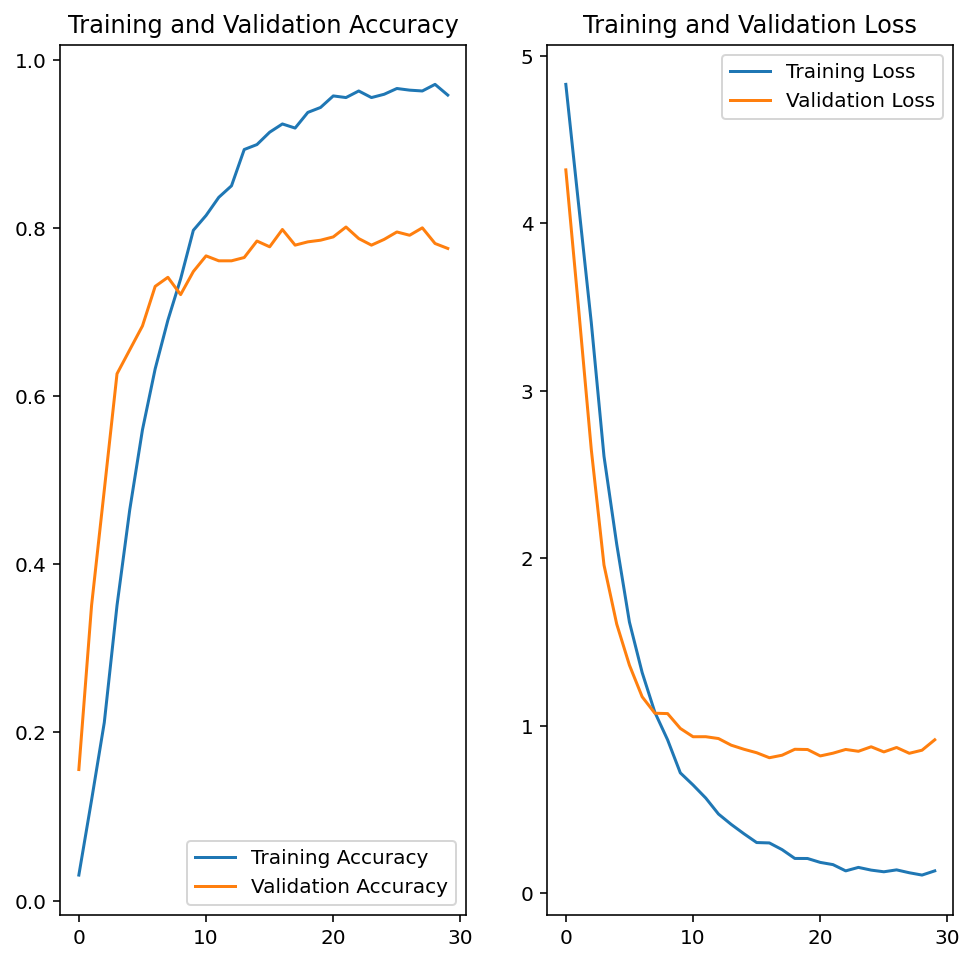

In [25]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
import time
t = time.time()

model.summary()

saved_keras_model_filepath = './{}.h5'.format(int(t))

model.save(saved_keras_model_filepath, overwrite=False)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 800)               1024800   
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               40902     
Total params: 3,644,086
Trainable params: 1,386,102
Non-trainable params: 2,257,984
______________________________________

In [27]:
reloaded_keras_model = tf.keras.models.load_model((saved_keras_model_filepath),custom_objects={'KerasLayer':hub.KerasLayer})

reloaded_keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 800)               1024800   
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               40902     
Total params: 3,644,086
Trainable params: 1,386,102
Non-trainable params: 2,257,984
______________________________________

In [28]:
for image_batch, label_batch in testing_batches.take(1):
    prediction_1 = model.predict(image_batch)
    prediction_2 = reloaded_keras_model.predict(image_batch)
    difference = np.abs(prediction_1 - prediction_2)
    print(difference.max())

0.0


In [29]:
image_resize = 224

def process_image(image):
  image = tf.image.resize(image, (image_resize, image_resize))/255.0
  return image

In [30]:
for image_batch, label_batch in training_batches.take(1):
    print('The images in each batch have:')
    print('\u2022 dtype:', image_batch.dtype) 
    print('\u2022 shape:', image_batch.shape)
  
    print('\nThere are a total of {} image labels in this batch:'.format(label_batch.numpy().size))
    print(label_batch.numpy())
  
  

The images in each batch have:
• dtype: <dtype: 'float32'>
• shape: (32, 224, 224, 3)

There are a total of 32 image labels in this batch:
[ 89   2  36  95  55  44 101  48  23  32  34 101  26  88  70   9  90  77
  28  94  80  79  92  25  46  50  48  52  90  36  94  95]


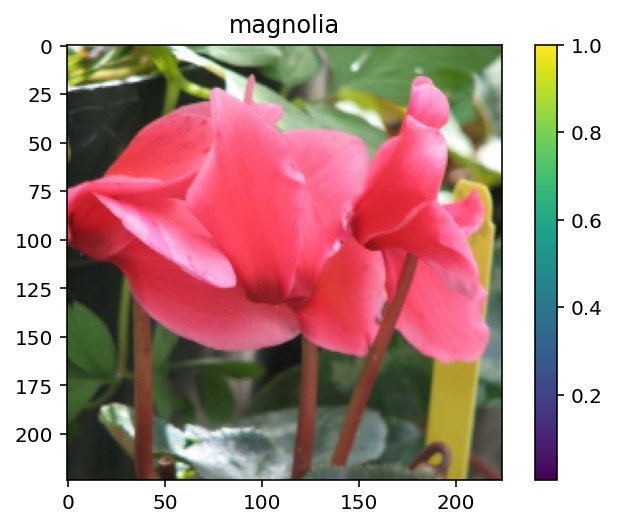

The label of this image is: 87


In [31]:
# Take a single batch of images, and remove the color dimension by squeezing it
for image_batch, label_batch in training_batches.take(1):
    images = image_batch.numpy().squeeze()
    labels = label_batch.numpy()

# Plot the image
plt.title(class_names[str(labels[0])])
plt.imshow(images[0])
plt.colorbar()
plt.show()

print('The label of this image is:', labels[0])

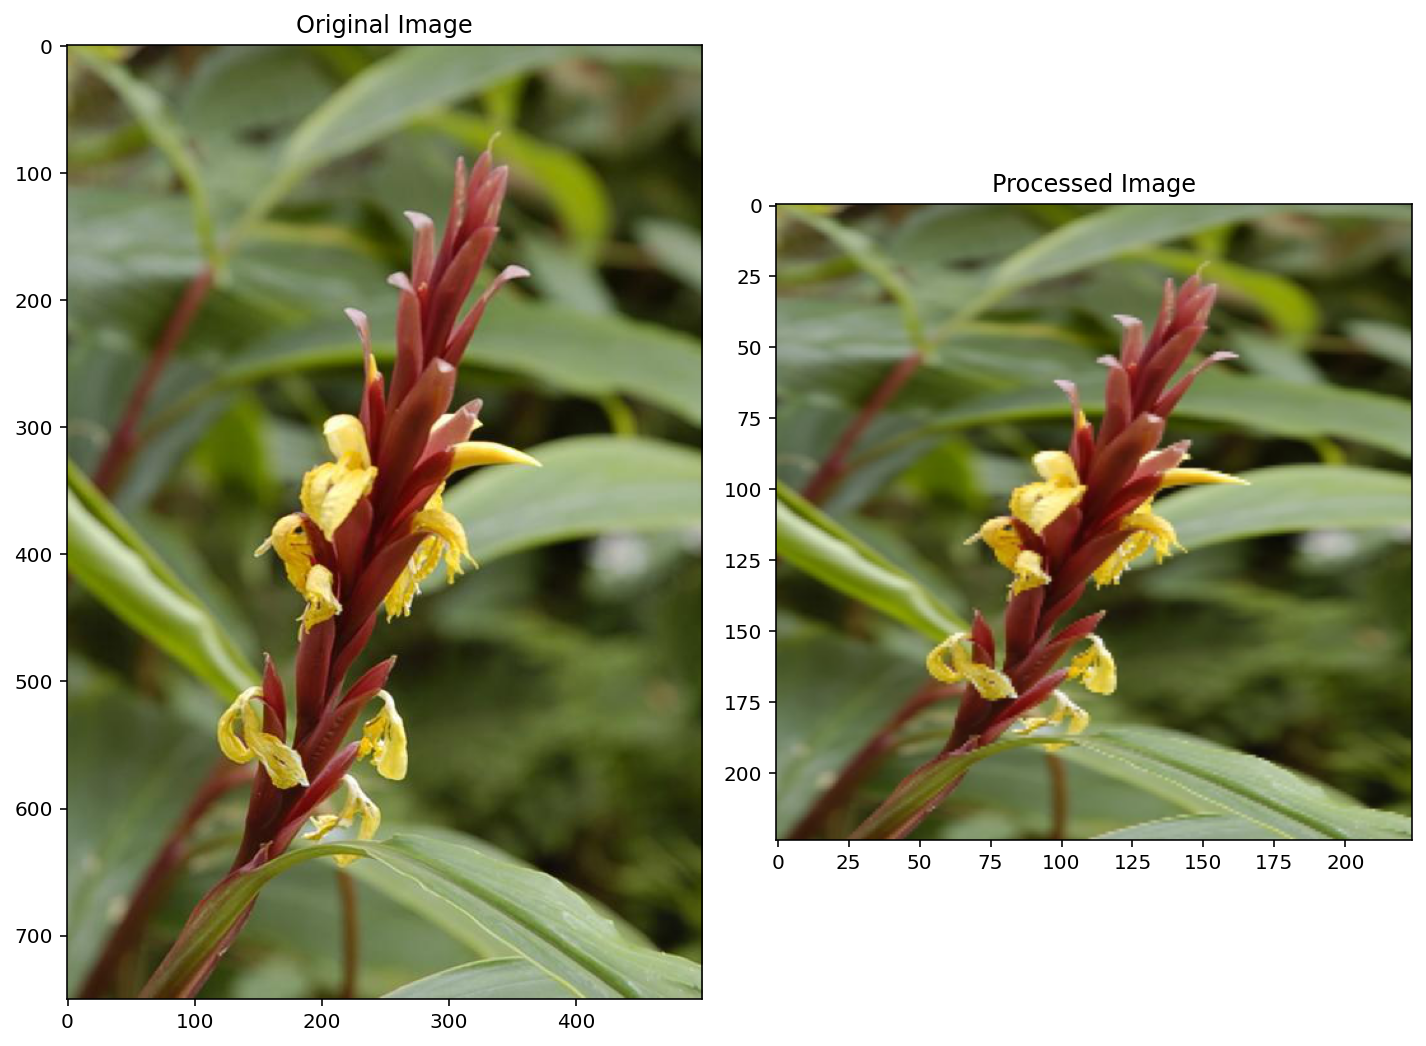

In [32]:
from PIL import Image

image_path = './cautleya_spicata.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [33]:
def predict(image_path, model, top_k = 5):
   im = Image.open(image_path)
   test_image = np.asarray(im)
   processed_test_image = process_image(test_image)
   expanded_image = np.expand_dims(processed_test_image, axis=0)
   result = model.predict(expanded_image, batch_size=1)
   values, indices= tf.math.top_k(result[0], k=top_k)
   probs=values.numpy().tolist()
   classes=indices.numpy().tolist()
   return probs, classes
probs, classes = predict(image_path, model)

print(probs)
print(classes)
  

[0.999568521976471, 0.00038074771873652935, 3.5511679016053677e-05, 4.4319826884020586e-06, 2.880529336835025e-06]
[60, 23, 38, 37, 58]


In [34]:
classNames = []
for value in classes:
  classNames.append(class_names[str(value+1)])
classNames


['cautleya spicata',
 'red ginger',
 'siam tulip',
 'great masterwort',
 'orange dahlia']

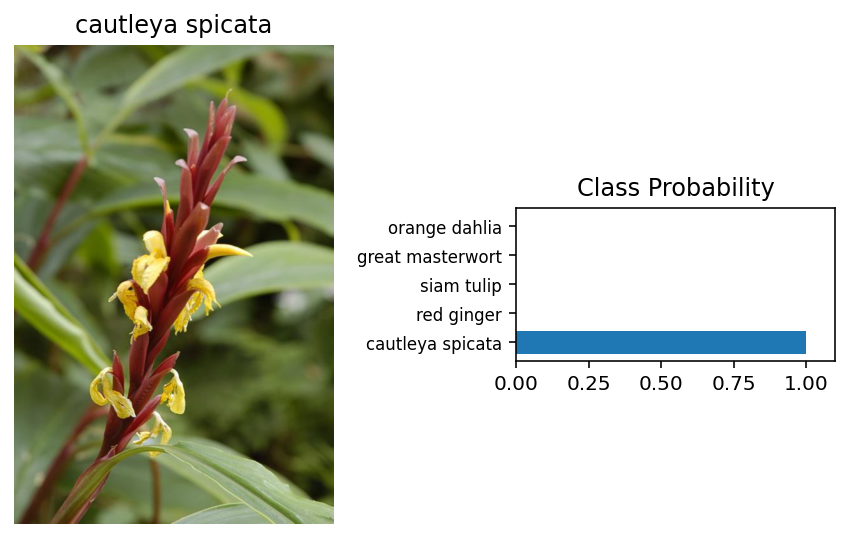

In [35]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(test_image)
ax1.axis('off')
ax1.set_title(classNames[0])
ax2.barh(np.arange(5), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(5))
ax2.set_yticklabels(classNames, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()